In [78]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as datareader
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout,Activation,Input, Bidirectional, Softmax, Flatten

In [2]:
data = pd.read_csv("C:/Users/Rachit/Downloads/fred_quarterly.csv")
data.head()

,date,month,quarter,Target,gnp,gdpdef,gdp
0,1/1/2000,2000-01,2000Q1,12935.252,10035.263,77.325,10002.179
1,4/1/2000,2000-04,2000Q2,13170.749,10283.391,77.807,10247.720
2,7/1/2000,2000-07,2000Q3,13183.890,10348.645,78.263,10318.165
3,10/1/2000,2000-10,2000Q4,13262.250,10490.430,78.688,10435.744
4,1/1/2001,2001-01,2001Q1,13219.251,10510.297,79.204,10470.231


In [3]:
data.shape, data.isnull().sum()

((86, 7),
 date       0
 month      0
 quarter    0
 Target     0
 gnp        1
 gdpdef     0
 gdp        0
 dtype: int64)

In [4]:
data.dropna(axis=0,inplace=True)

In [5]:
data.shape, data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     85 non-null     object 
 1   month    85 non-null     object 
 2   quarter  85 non-null     object 
 3   Target   85 non-null     float64
 4   gnp      85 non-null     float64
 5   gdpdef   85 non-null     float64
 6   gdp      85 non-null     float64
dtypes: float64(4), object(3)
memory usage: 5.3+ KB


((85, 7), None)

In [6]:
data['date'] = pd.to_datetime(data['date'])

In [7]:
data.head()

,date,month,quarter,Target,gnp,gdpdef,gdp
0,2000-01-01,2000-01,2000Q1,12935.252,10035.263,77.325,10002.179
1,2000-04-01,2000-04,2000Q2,13170.749,10283.391,77.807,10247.720
2,2000-07-01,2000-07,2000Q3,13183.890,10348.645,78.263,10318.165
3,2000-10-01,2000-10,2000Q4,13262.250,10490.430,78.688,10435.744
4,2001-01-01,2001-01,2001Q1,13219.251,10510.297,79.204,10470.231


In [8]:
data.set_index('date',inplace=True)
data.head()

,month,quarter,Target,gnp,gdpdef,gdp
date,,,,,,
2000-01-01,2000-01,2000Q1,12935.252,10035.263,77.325,10002.179
2000-04-01,2000-04,2000Q2,13170.749,10283.391,77.807,10247.720
2000-07-01,2000-07,2000Q3,13183.890,10348.645,78.263,10318.165
2000-10-01,2000-10,2000Q4,13262.250,10490.430,78.688,10435.744
2001-01-01,2001-01,2001Q1,13219.251,10510.297,79.204,10470.231


In [9]:
dz = data.filter(['Target'])
dz.head()

,Target
date,
2000-01-01,12935.252
2000-04-01,13170.749
2000-07-01,13183.890
2000-10-01,13262.250
2001-01-01,13219.251


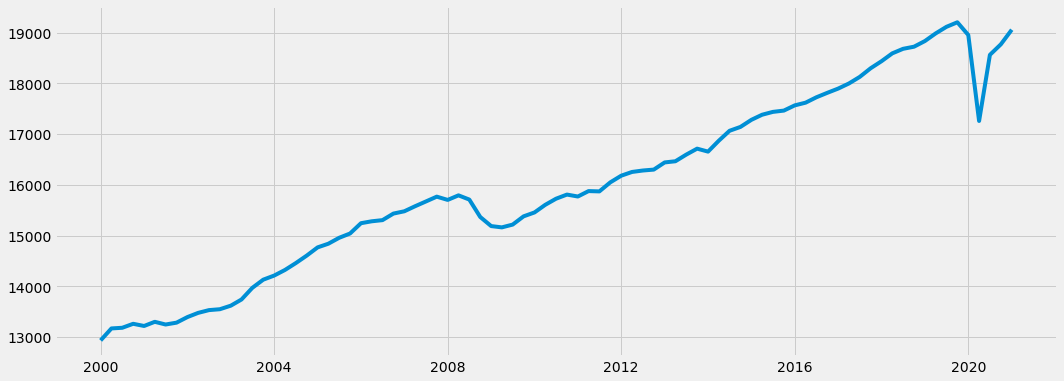

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,6))
plt.plot(dz)
plt.show()

In [11]:
print(dz.shape)
df = dz.values.reshape(dz.shape[0],dz.shape[1],1)
print(df.shape)

(85, 1)
(85, 1, 1)


In [12]:
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(df.reshape(-1,1))
len(scaled_data)

85

In [45]:
train_len = int(len(scaled_data)*0.75)
test_len = len(scaled_data)-train_len

train_data = scaled_data[0:train_len]
test_data = scaled_data[train_len-7:]

In [46]:
print(train_len, test_len)

63 22


In [47]:
x_train = []
y_train = []

for i in range(7,train_len):
    x_train.append(train_data[i-7:i,0])
    y_train.append(train_data[i,0])
    
    
x_train,y_train = np.array(x_train), np.array(y_train)

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)

print(x_train.shape)

x_test = []
y_test = []

for i in range(7,len(test_data)):
    x_test.append(test_data[i-7:i,0])
    y_test.append(test_data[i,0])
    
x_test,y_test = np.array(x_test),np.array(y_test)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

(56, 7, 1)


In [148]:
model = Sequential()
model.add(Bidirectional(LSTM(100,return_sequences=True),input_shape = (x_train.shape[1],1)))
# model.add(Bidirectional(LSTM(64,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,activation='relu')))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=False))
model.add(Dropout(0.2))
model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Dense(1))

In [149]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),loss='mean_squared_error')
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_18 (Bidirectio (None, 7, 200)            81600     
_________________________________________________________________
dropout_16 (Dropout)         (None, 7, 200)            0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 50)                50200     
_________________________________________________________________
dropout_17 (Dropout)         (None, 50)                0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 25)                1275      
_________________________________________________________________
activation_3 (Activation)    (None, 25)              

In [150]:
model.fit(x_train,y_train,batch_size=1,epochs=100,verbose=1,validation_split=0.1)

Epoch 1/100
50/50 [==============================] - 1s 23ms/step - loss: 0.0304 - val_loss: 0.0038
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.0309
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.0234
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0283
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.0100
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0105
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.0073
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.0329
Epoch 9/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0031
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 1.3449e-04
Epoc

Epoch 82/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 2.5107e-04
Epoch 83/100
50/50 [==============================] - 0s 3ms/step - loss: 7.7573e-04 - val_loss: 0.0010
Epoch 84/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0082
Epoch 85/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0049
Epoch 86/100
50/50 [==============================] - 0s 3ms/step - loss: 6.1484e-04 - val_loss: 0.0019
Epoch 87/100
50/50 [==============================] - 0s 3ms/step - loss: 9.9850e-04 - val_loss: 0.0012
Epoch 88/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0099
Epoch 89/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 4.3126e-04
Epoch 90/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 1.7147e-04
Epoch 91/100
50/50 [==============================] - 0s 3ms/step - loss: 5.

In [160]:
train_predict = model.predict(x_train)
train_predict.shape

(56, 1)

In [187]:
x_train.shape

(56, 7, 1)

In [190]:
train_predictions = scalar.inverse_transform(train_predict)
train_predictions.shape

(56, 1)

In [163]:
predictions = model.predict(x_test)
predictions.shape

(22, 1)

In [164]:
train_predictions.reshape(-1), scalar.inverse_transform(y_train.reshape(-1,1)).reshape(-1)

(array([14073.45 , 14075.598, 14087.567, 14112.747, 14128.948, 14129.766,
        14129.766, 14131.366, 14161.352, 14226.853, 14299.352, 14377.702,
        14468.382, 14579.61 , 14705.347, 14811.384, 14933.046, 15077.486,
        15292.166, 15347.212, 15388.768, 15449.551, 15497.416, 15553.739,
        15613.   , 15673.626, 15691.284, 15732.645, 15729.875, 15636.897,
        15541.715, 15475.691, 15444.344, 15463.4  , 15489.563, 15546.909,
        15618.235, 15687.132, 15719.447, 15774.421, 15801.771, 15873.742,
        15950.727, 16017.556, 16066.947, 16105.589, 16175.972, 16221.329,
        16293.358, 16371.519, 16394.592, 16493.145, 16613.432, 16706.855,
        16820.47 , 16923.107], dtype=float32),
 array([13284.881, 13394.91 , 13477.356, 13531.741, 13549.421, 13619.434,
        13741.107, 13970.157, 14131.379, 14212.34 , 14323.017, 14457.832,
        14605.595, 14767.846, 14839.707, 14956.291, 15041.232, 15244.088,
        15281.525, 15304.517, 15433.643, 15478.956, 15577.779, 15

In [165]:
loss = np.sqrt(mean_squared_error(y_test,predictions))
print(loss)

0.09881505658041832


In [193]:
85-train_len,predictions.shape

(22, (22, 1))

In [194]:
train_x = dz[:train_len]
train_x['predictions'] = np.append([[0],[0],[0],[0],[0],[0],[0]],train_predictions)
valid = dz[train_len:]
valid['predictions'] = scalar.inverse_transform(predictions)

<ipython-input-194-fdf95d9582b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['predictions'] = np.append([[0],[0],[0],[0],[0],[0],[0]],train_predictions)
<ipython-input-194-fdf95d9582b7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = scalar.inverse_transform(predictions)


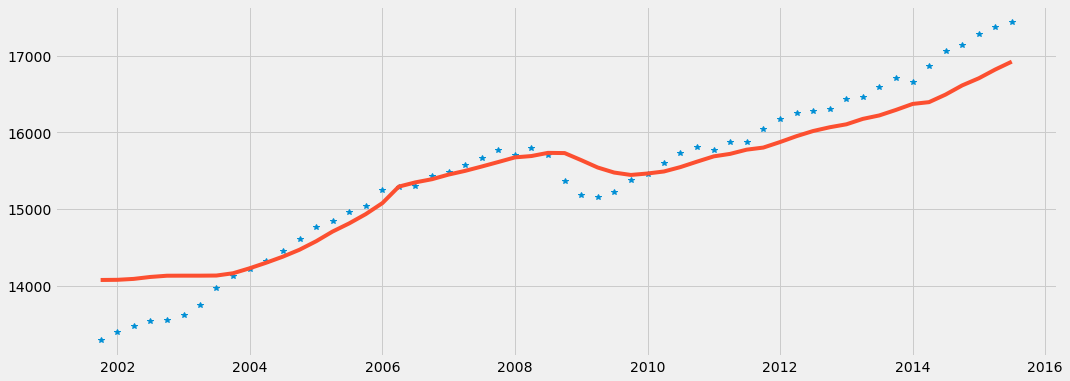

In [196]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,6))
plt.plot(train_x['Target'][7:],'*')
plt.plot(train_x['predictions'][7:])
plt.show()

In [ ]:
model.save("C:/Users/Rachit/Jupyter_notebook/mymodel")

In [159]:
model = tf.keras.models.load_model("./mymodel/")

In [134]:
model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_26 (Bidirectio (None, 8, 100)            20800     
_________________________________________________________________
dropout_50 (Dropout)         (None, 8, 100)            0         
_________________________________________________________________
lstm_91 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dropout_51 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_91 (Dense)             (None, 25)                1275      
_________________________________________________________________
activation_6 (Activation)    (None, 25)                0         
_________________________________________________________________
dense_92 (Dense)             (None, 10)              

In [168]:
data.tail()

,month,quarter,Target,gnp,gdpdef,gdp
date,,,,,,
2020-01-01,2020-01,2020Q1,18951.992,21721.267,113.346,21481.367
2020-04-01,2020-04,2020Q2,17258.205,19649.442,112.859,19477.444
2020-07-01,2020-07,2020Q3,18560.774,21365.412,113.888,21138.574
2020-10-01,2020-10,2020Q4,18767.778,21728.223,114.439,21477.597
2021-01-01,2021-01,2021Q1,19055.655,22273.060,115.652,22038.226


In [197]:
quarter_results = np.zeros(6)
dl = data.filter(['Target'])

for i in range(0,6):
    dx = dl[-8+i:]
    if dx.shape[0] != 8:
        ap = quarter_results[:8-dx.shape[0]].reshape(-1,1)
        dx = np.append(dx.values,ap)
        
    else:
        dx = dx.values
        
    result = scalar.transform(dx.reshape(-1,1))
    result = result.reshape(1,8,1)
    result = model.predict(result)
    result = scalar.inverse_transform(result)
    quarter_results[i] = result[0][0]

In [198]:
quarter_results

array([18709.33007812, 18581.14453125, 18528.765625  , 18464.85351562,
       18409.50976562, 18377.92382812])

In [203]:
Date = ['2021-04-01','2021-07-01','2021-10-01','2022-01-01','2022-04-01','2022-07-01']
data = pd.DataFrame(Date,columns=['Date'])
data['Quarter'] = quarter_results

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)

In [205]:
data.to_csv("C:/Users/Rachit/Jupyter_notebook/result.csv")

In [182]:
m = tf.keras.metrics.Accuracy()
m.update_state(scalar.inverse_transform(y_train.reshape(-1,1)),train_predictions)
m.result().numpy()

0.0

In [ ]:
m = tf.keras.metrics.Accuracy()
m.update_state(scalar.inverse_transform(y_train.reshape(-1,1)),train_predictions).numpy()